<a href="https://colab.research.google.com/github/NovrianPratama/MachineLearning/blob/main/Latihan_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=15, n_informative=10,
                           n_redundant=2, n_clusters_per_class=1, weights=[0.9],
                           flip_y=0, random_state=42)


In [60]:
# membuat dataframe
df = pd.DataFrame(X, columns=[f"fitur_{i}" for i in range(1,16)])
df['Target'] = y

# Simulasi fitur kategorical
df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Fitur_13'] = np.random.choice(['A', 'B', 'C'], size=1000)

df

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15,Target,Fitur_12,Fitur_13
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,1.459826,-1.024592,1.005559,-0.276558,0,C,A
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,2.236310,-0.001984,-0.243630,0.285979,0,B,C
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,0.671318,-3.175360,2.486020,-2.867291,0,A,B
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,0.776033,-0.494986,-0.788215,1.255376,0,B,B
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,3.038337,-0.391516,0.712335,2.810524,0,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,3.201742,-0.576096,-0.387151,-2.629004,0,C,A
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,0.661162,-2.550410,0.886822,-1.248408,0,B,C
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,0.571311,5.103484,0.067260,0.931995,1,B,C
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,-0.890017,-1.193708,-0.128774,0.800834,0,B,A


In [61]:
# memisahkan data independen dan depende
X = df.drop('Target', axis=1)
y = df['Target']

In [62]:
# Melihat distribusi kelas
from collections import Counter # untuk menghitung frekuensi elemen

print('Distribusi kelas sebelum SMOTE:', Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


In [63]:
# Feature Selection dengan teknik Embedded
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
# Teknik Embedded
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = df.drop(['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(X_integer, y)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.05 # ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilai nya
print("Fitur Penting:")
for i in important_features_indices:
  # JIka X asli berbentuk kolom kita ambil nama kolom
  print(f"{X.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasrkan importances
important_features = X_integer.columns[important_features_indices]

# memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]

print(f"\nDimensi data pelatihan denga fitur penting: {X_important.shape}")

Fitur Penting:
fitur_2: 0.06659597940870575
fitur_9: 0.12715110102927046
fitur_13: 0.054557540281754184
fitur_15: 0.065505916170171
Fitur_12: 0.534566318546054

Dimensi data pelatihan denga fitur penting: (1000, 5)


In [65]:
print(X_important)

      fitur_2   fitur_9  fitur_13  fitur_15  Target
0   -3.472520 -2.173112 -1.024592 -0.276558       0
1   -1.770842 -0.598147 -0.001984  0.285979       0
2   -2.051770 -1.140149 -3.175360 -2.867291       0
3   -1.608657 -0.830328 -0.494986  1.255376       0
4   -2.362885 -2.142380 -0.391516  2.810524       0
..        ...       ...       ...       ...     ...
995 -0.017325 -1.293396 -0.576096 -2.629004       0
996 -1.690916 -2.153011 -2.550410 -1.248408       0
997 -1.263417  1.753033  5.103484  0.931995       1
998 -0.975838 -0.643070 -1.193708  0.800834       0
999  1.387667  2.625895  1.583909  2.511309       0

[1000 rows x 5 columns]


In [66]:
X_selected = pd.concat([X_important, X['Fitur_12']], axis=1)
X_selected = pd.concat([X_selected, X['Fitur_13']], axis=1)
X_selected

,fitur_2,fitur_9,fitur_13,fitur_15,Target,Fitur_12,Fitur_13
0,-3.472520,-2.173112,-1.024592,-0.276558,0,C,A
1,-1.770842,-0.598147,-0.001984,0.285979,0,B,C
2,-2.051770,-1.140149,-3.175360,-2.867291,0,A,B
3,-1.608657,-0.830328,-0.494986,1.255376,0,B,B
4,-2.362885,-2.142380,-0.391516,2.810524,0,C,B
...,...,...,...,...,...,...,...
995,-0.017325,-1.293396,-0.576096,-2.629004,0,C,A
996,-1.690916,-2.153011,-2.550410,-1.248408,0,B,C
997,-1.263417,1.753033,5.103484,0.931995,1,B,C
998,-0.975838,-0.643070,-1.193708,0.800834,0,B,A


In [67]:
# Mengubah fitur kategorical menjadi numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_selected['Fitur_12'] = label_encoder.fit_transform(X_selected['Fitur_12'])
X_selected['Fitur_13'] = label_encoder.fit_transform(X_selected['Fitur_13'])

X_selected

,fitur_2,fitur_9,fitur_13,fitur_15,Target,Fitur_12,Fitur_13
0,-3.472520,-2.173112,-1.024592,-0.276558,0,2,0
1,-1.770842,-0.598147,-0.001984,0.285979,0,1,2
2,-2.051770,-1.140149,-3.175360,-2.867291,0,0,1
3,-1.608657,-0.830328,-0.494986,1.255376,0,1,1
4,-2.362885,-2.142380,-0.391516,2.810524,0,2,1
...,...,...,...,...,...,...,...
995,-0.017325,-1.293396,-0.576096,-2.629004,0,2,0
996,-1.690916,-2.153011,-2.550410,-1.248408,0,1,2
997,-1.263417,1.753033,5.103484,0.931995,1,1,2
998,-0.975838,-0.643070,-1.193708,0.800834,0,1,0


In [68]:
X_selected['Target'].value_counts()

,count
Target,
0,901
1,99


In [69]:
# Membuat salinan data untuk menjaga data asli tetap utuh
X_clean = X_selected.copy()

# memilih kolom numeric
numeric_columns = X_selected.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])

In [70]:
X_clean['Target'].value_counts()

,count
Target,
0,901
1,99


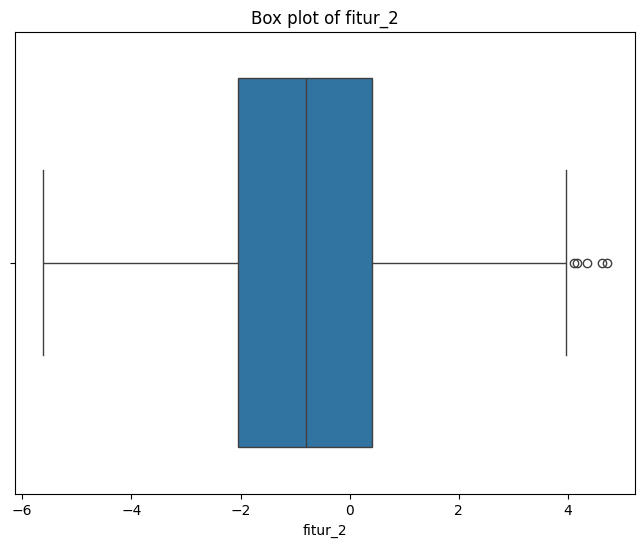

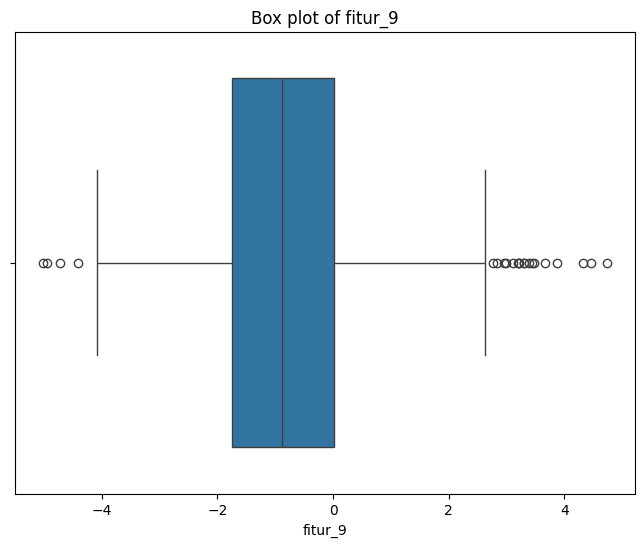

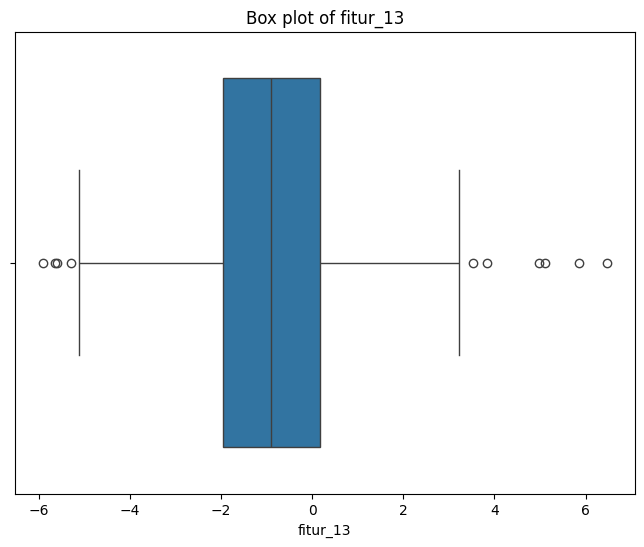

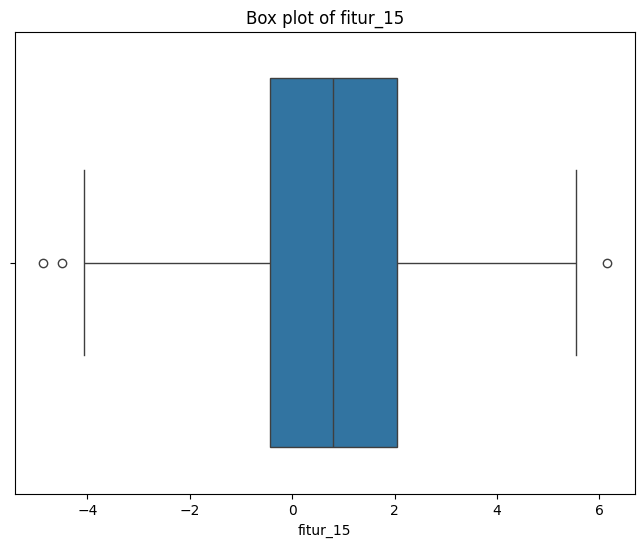

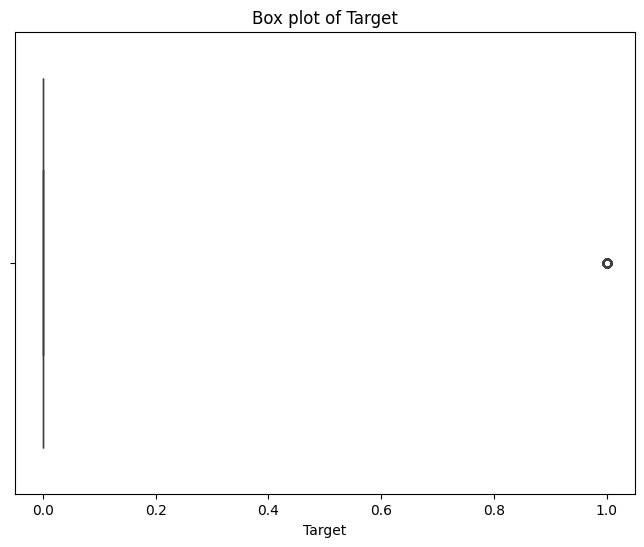

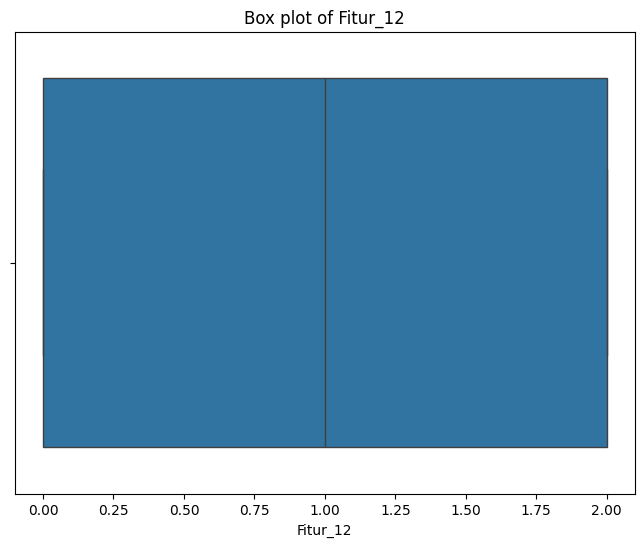

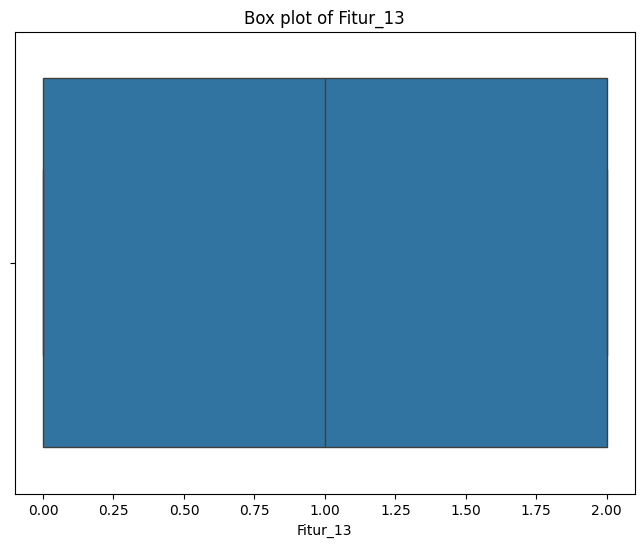

In [54]:

# cek outlier
for feature in X_clean:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_clean[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [55]:
# Mengatasi outlier menggunakan teknik interquartile range (IQR)
for col in numeric_columns:
  # Melihat outlier dengan IQR
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = X_clean[(X_clean[col] < lower_bound) | (X_clean[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    X_clean = X_clean.drop(outliers.index)

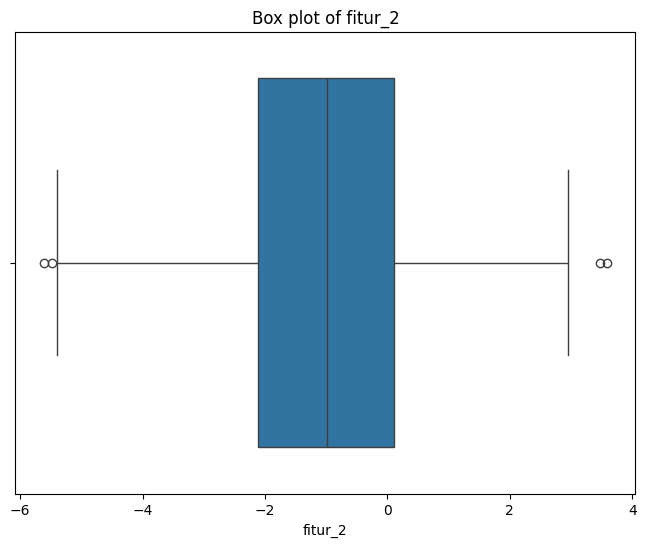

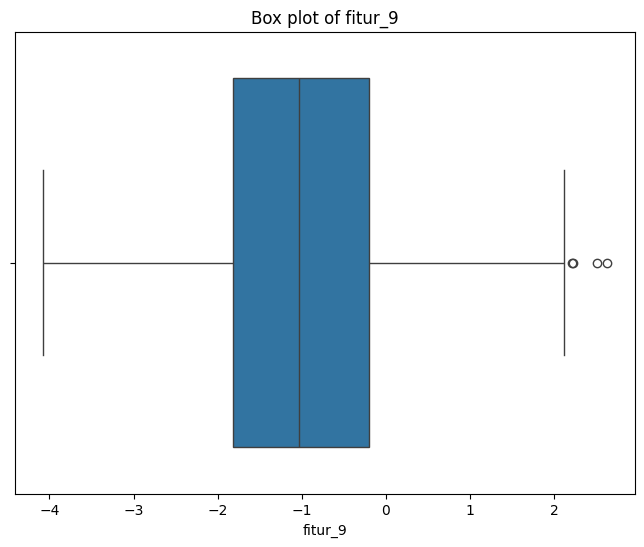

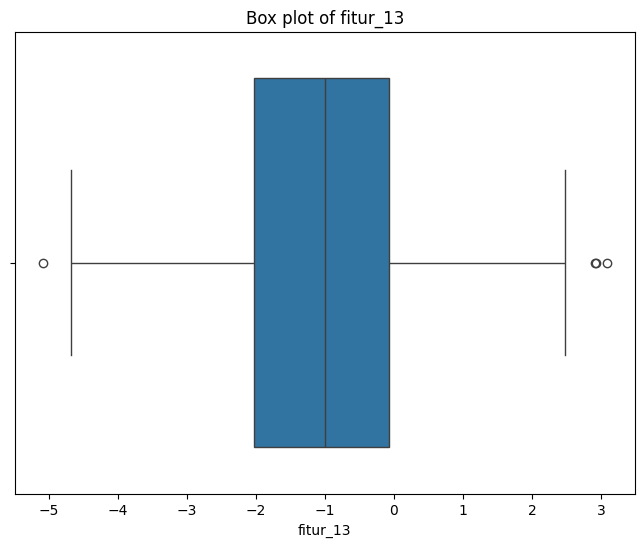

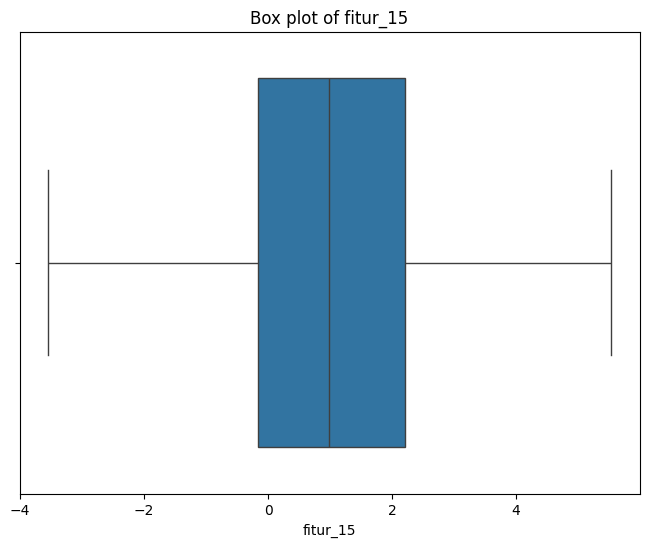

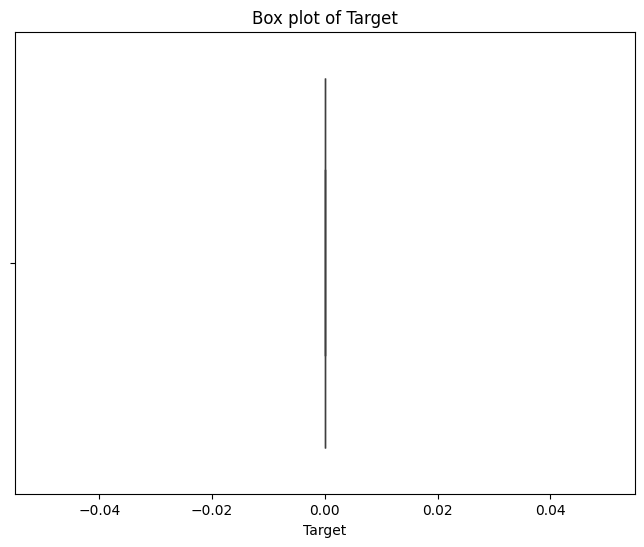

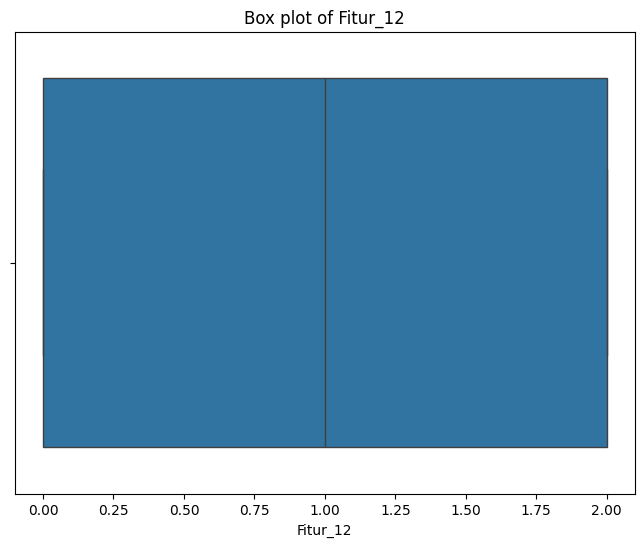

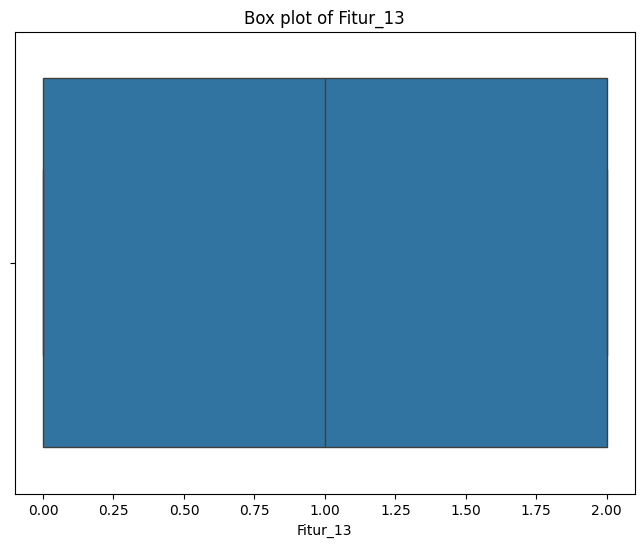

In [56]:
# Cek outlier setelah diatasi
# cek outlier
for feature in X_clean:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_clean[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [57]:
X_clean['Target'].value_counts()

,count
Target,
0,891


In [49]:
X_clean

,fitur_2,fitur_9,fitur_13,fitur_15,Target,Fitur_12,Fitur_13
0,-3.472520,-2.173112,-1.024592,-0.276558,0,0,0
1,-1.770842,-0.598147,-0.001984,0.285979,0,0,2
2,-2.051770,-1.140149,-3.175360,-2.867291,0,1,1
3,-1.608657,-0.830328,-0.494986,1.255376,0,0,0
4,-2.362885,-2.142380,-0.391516,2.810524,0,1,1
...,...,...,...,...,...,...,...
995,-0.017325,-1.293396,-0.576096,-2.629004,0,2,1
996,-1.690916,-2.153011,-2.550410,-1.248408,0,1,2
997,-1.263417,1.753033,5.103484,0.931995,1,1,1
998,-0.975838,-0.643070,-1.193708,0.800834,0,0,0


In [51]:
# Mengatasi data imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# Ambil subset dari y agar ukurannya sama dengan X_clean
y = y[:X_clean.shape[0]]


# Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_clean, y)

# menampilkan distribusi data setelah smote
print("Distribusi data setelah smote: ", Counter(y_resampled))

# Mengubah hasil menjadi dataframe
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1000, 891]

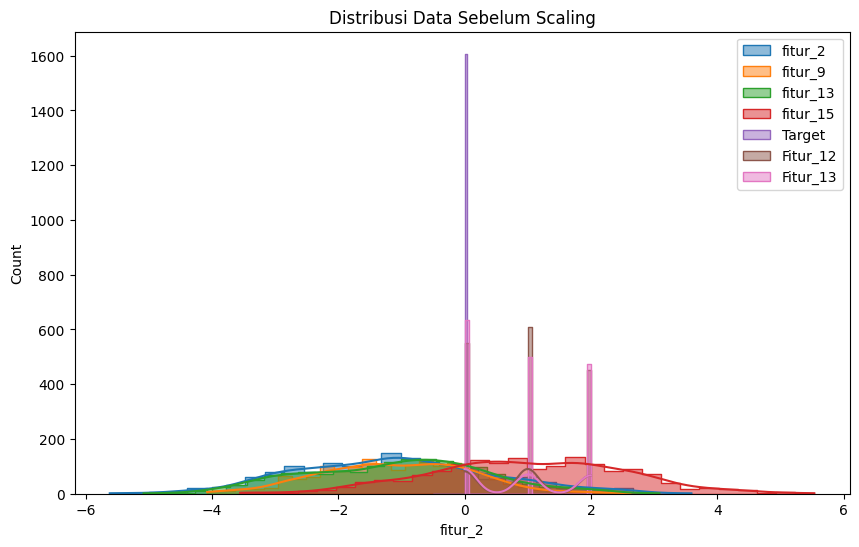

In [18]:
# Visualiasi data sebelum scaling
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
  sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling')
plt.legend()
plt.show()

In [19]:
# Proses scaling data
# Scaling: Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur penting
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

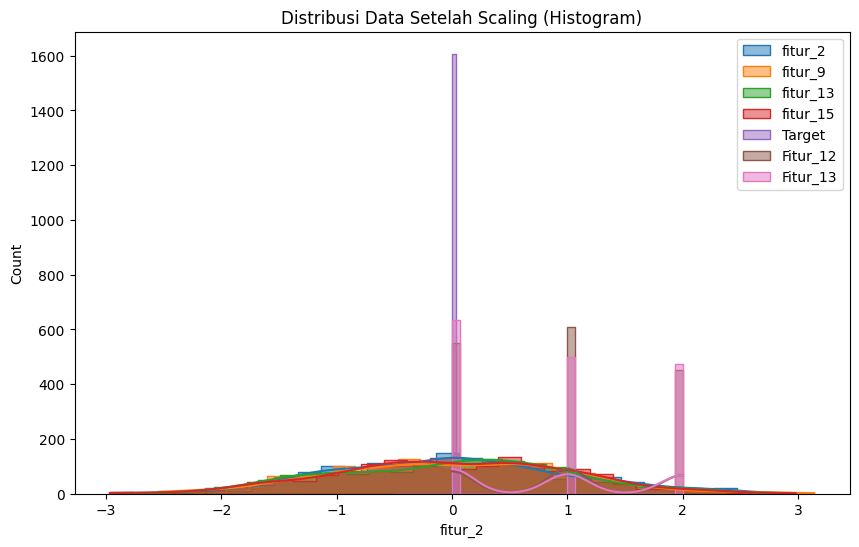

In [20]:
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [21]:
X_resampled.describe(include='all')

,fitur_2,fitur_9,fitur_13,fitur_15,Target,Fitur_12,Fitur_13
count,1.608000e+03,1.608000e+03,1.608000e+03,1.608000e+03,1608.0,1608.000000,1608.000000
mean,-3.093159e-17,1.325639e-16,-8.174776e-17,2.319869e-17,0.0,0.939677,0.899254
std,1.000311e+00,1.000311e+00,1.000311e+00,1.000311e+00,0.0,0.786930,0.824968
min,-2.944855e+00,-2.552918e+00,-2.835383e+00,-2.969068e+00,0.0,0.000000,0.000000
25%,-7.266504e-01,-7.344109e-01,-7.670538e-01,-6.741991e-01,0.0,0.000000,0.000000
50%,-1.757143e-02,1.886195e-03,6.363564e-02,-2.632838e-02,0.0,1.000000,1.000000
75%,6.479340e-01,7.376841e-01,6.845139e-01,7.124733e-01,0.0,2.000000,2.000000
max,3.070436e+00,3.141245e+00,2.932139e+00,2.979967e+00,0.0,2.000000,2.000000


In [22]:
X_resampled['Target'].value_counts()

,count
Target,
0.0,1608
